<a href="https://colab.research.google.com/github/sm160388/hotel-booking-analysis/blob/main/Final_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

  Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

 This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.Explore and analyze the data to discover important factors that govern the bookings. 

First things first! For any manipulation related to data starts with understanding the data. It is a step wise and sequencial process, which seems to have shortcut but actually... we realize shortcuts here are long cuts! In order to approach the given problem it have prepared the schema which we will be following during the analysis which is as below:


**1.** **Getting the data**\
**2.** **Data Exploration**\
**3.** **Cleaning and pre pocessing of the data**\
**4.**  **EDA and visulaization**

## **Getting the Data**


In [ ]:
#importing all important python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 
from time import strftime

In [ ]:
#mounting drive
from google.colab import drive            
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#defining the path of the file
path = "/content/drive/MyDrive/Copy of Hotel Bookings.csv"

In [ ]:
 #reading csv file
data=pd.read_csv(path)

# **Data Exploration**

First thig first, let's explore our dataset and see what is inside

In [ ]:
#to check number of rows and column we have
data.shape   

(119390, 32)

In [ ]:
#checking first 5 rows
data.head()  

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#checking last 5 rows
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


So, as we can see we have 32 columns and 119390 rows in our dataset. Now let's deep dive more into the column information.

In [ ]:
#to know heading of columns in dataset
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#let's check information of dataset to know datatype of all columns to understand in better way
data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Each row of the dataframe represents a unique customer, and variables are very much self explanatory. Just adr denotes average daily rate paid by the customer and lead_time is the time between booking and visiting the hotel.

In [ ]:
#to get quick observation of dataset we have
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


*Quick observation*
37.04 % of the people have cancelled their booking as per the dataset.
Avg. lead time is 104 days.
Only 3% of the guests are repeated.Average adr is 101.8.

#**Cleaning and pre-processing of the dataset**

While cleaning data we will perform following steps:
1)Remove Duplicates
2)Handling missing values
3)Convert columns to appropriate datatypes.


**Dropping Duplicates**

In [ ]:
# rows containing duplicate data
duplicate_rows_data = data[data.duplicated()]
print("Number of duplicate rows:", duplicate_rows_data.shape)

Number of duplicate rows: (31994, 32)


In [ ]:
# Droping duplicate values
data.drop_duplicates(inplace=True)

In [ ]:
data.shape  

(87396, 32)

**Missing values**

In [ ]:
# getting summary of missing values present in the dataset.
for column in data:
  if data[column].isnull().any():
    print('{0} column has {1} missing values, which are {2} % of total column'.format(column,data[column].isnull().sum(),round(data[column].isnull().sum()*100/data.shape[0],3)))

children column has 4 missing values, which are 0.005 % of total column
country column has 452 missing values, which are 0.517 % of total column
agent column has 12193 missing values, which are 13.951 % of total column
company column has 82137 missing values, which are 93.983 % of total column


In [ ]:
# as company column has 94% missing values so we are dropping that column
data=data.drop(['company'],axis=1)

In [ ]:
#filling null values
data['agent'].fillna(0, inplace = True)                               # filling null values of agent with 0
data['children'].fillna(data['children'].mean(), inplace = True)      #filling null values of children with mean
data['country'].fillna('unknown', inplace = True)                     # filling null values of country with 'unknown'

**Converting columns to appropriate datatypes.**

In [ ]:
#now let's convert datatype of columns 'children' and 'agent' from float to int.
data[['children','agent']]=data[['children','agent']].astype(int)

In [ ]:
# changing datatype of column 'reservation_status_date' to date-type.
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], format = '%Y-%m-%d')

**Adding important columns.**

In [ ]:
#let's group some of the columns which can be useful in analysis as grouped element
data['total_stay']=data['stays_in_weekend_nights']+data['stays_in_week_nights']
data['total_guests']=data['children']+data['babies']+data['adults']

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [ ]:
#finding rows where total number of adults, children or babies equal to zero.
data[data['children']+data['babies']+data['adults']==0].shape

(166, 33)

In [ ]:
#dropping those data where total number of adults, children or babies equal to zero.
data.drop(data[data['children']+data['babies']+data['adults']==0].index,inplace=True)

In [ ]:
#dropping data where adr is negetive
data.drop(data[data['adr']<0].index,inplace=True)

# **Exploratory Data Analysis**

Now, our dataset is clean and ready-to-use for analysis and visualization. But, before moving towards analysis part , let us first try to estimate the reliablity of the dataset using Statistical techniques. As of now, we are limiting this till the outlier detection. Based on outliers, we will try to assume reliabilty of the data.

## Working on outliers

1.Outliers is an abnormally large or small value in the dataset which may lead to noise in the data.\
2.In general ,we try to avoid or remove these outliers from the dataset to make our dataset reliable and it is easy for analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

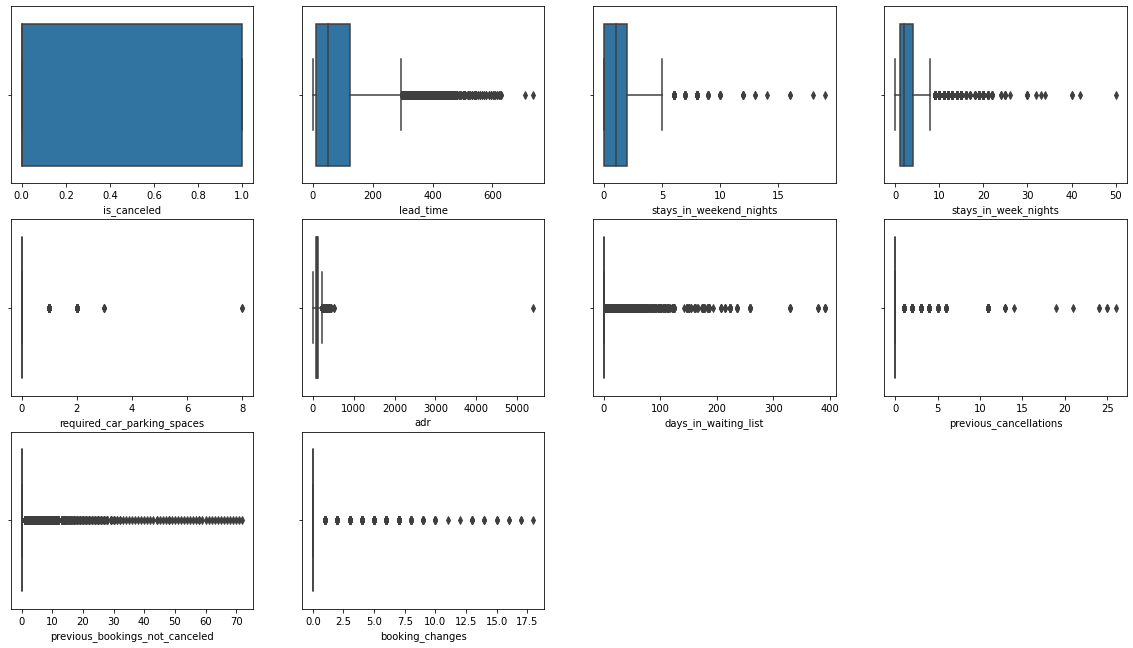

In [ ]:
# defining a variable containing all the numerical columns
columns = ['is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'required_car_parking_spaces', 'adr','days_in_waiting_list', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1

# plotting box plot using matplotlib

plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(data[column])


As we can see, this dataset has many outliers.It is clear that column lead_time and adr have outliers.Adr have outliers which is creating noise ,so we have to remove this outliers to make our data more reliable.

In [ ]:
#to remove outliers from adr
data.drop(data[data['adr'] > 5000].index, inplace = True)


## Heatmap

Lets first find the correlation between the numerical data.

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest',  'agent' are categorical data having numerical type. So we wont need to check them for correlation.

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [ ]:
num_data = data[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_guests']]

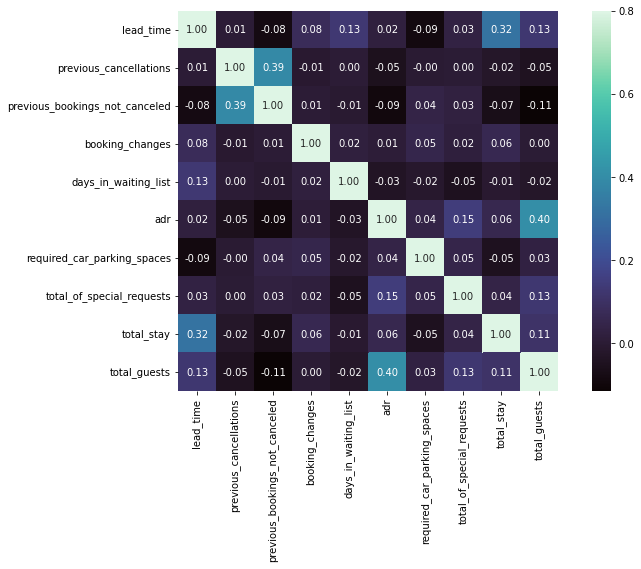

In [ ]:
#correlation matrix
corrmat = num_data.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True,cmap ='mako');

This is not a highly correlated data. So by seeing heatmap we are not able to find any highly correlated columns.Still we are able to find out two results from above heatmap:

1.Lead time and total stay have slight correlation. This means when people want to stay little longer they plan little before than actual arrival.

2.Total guests and adr has some correlation. This means the when the number of guests increases, adr will also increase.

## 1.Percentage of bookings in each hotel type

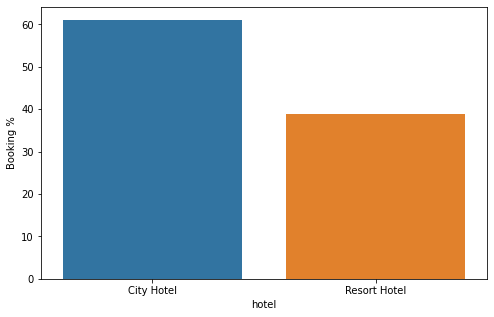

In [ ]:
#groupby hotel
grp_by_hotel=data.groupby('hotel')

#finding percentage
d1=pd.DataFrame((grp_by_hotel.size()/data.shape[0])*100).reset_index().rename(columns={0:'Booking %'})
plt.figure(figsize=(8,5))

#plotting barplot
sns.barplot(x=d1['hotel'],y=d1['Booking %'])
plt.show()

Around 60% bookings are for City Hotel and 40% are for Resort Hotel.

## 2.From which country most guests come?

In [ ]:
#finding maxiumum booking among all countries
max_all=data.groupby('country')['country'].count().max()

#finding sum
sum_all=data.groupby('country')['country'].count().sum()

#finding percentage of country from most guests come.
percentage_of_prt=max_all*100/sum_all
print("Percentage of country :",round(percentage_of_prt,2),"%" )

Percentage of country : 31.36 %


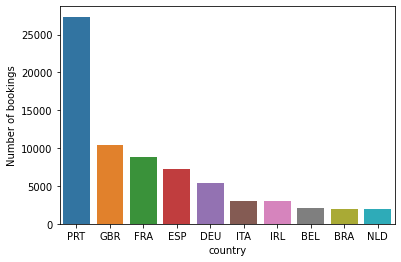

In [ ]:
#groupby country
group_by_country=data.groupby('country')

#getting top 10 values
d2=pd.DataFrame(group_by_country.size()).rename(columns={0:'Number of bookings'}).sort_values('Number of bookings',ascending=False)
d2=d2[:10]

#plotting barplot
sns.barplot(x=d2.index,y=d2['Number of bookings'])
plt.show()

Portugal is the country from where most guests come.Around 31.36 % of guests come from Portugal, followed by Great Britain and France.

##3.Which is the busiest month for hotels?

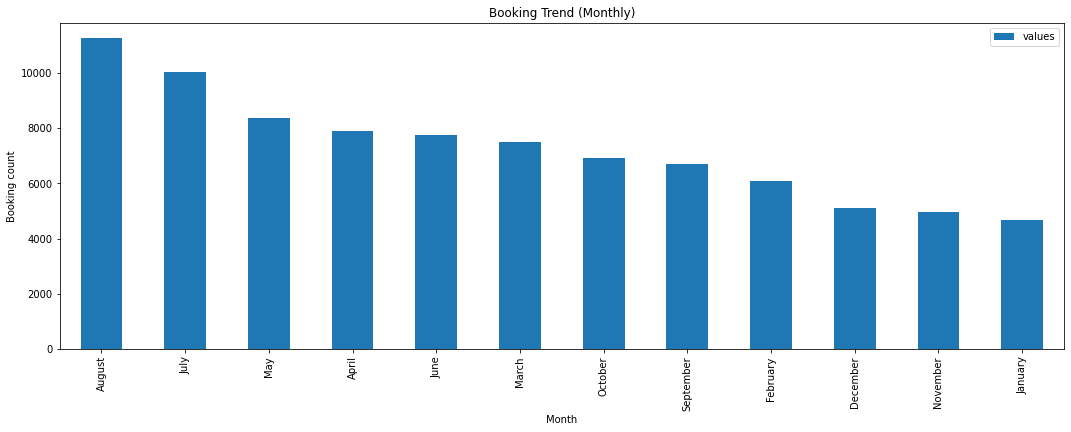

In [ ]:
#finding busiest month
busiest_month = data['arrival_date_month'].value_counts().reset_index()
busiest_month.columns=['month','values']

#plotting graph
busiest_month.plot('month', 'values', xlabel = 'Month', ylabel = 'Booking count', title='Booking Trend (Monthly)', kind='bar',figsize=(18,6))

As we can see most bookings were made from July to August. And the least bookings were made at the start and end of the year.

##4. Which room type is in most demand ?

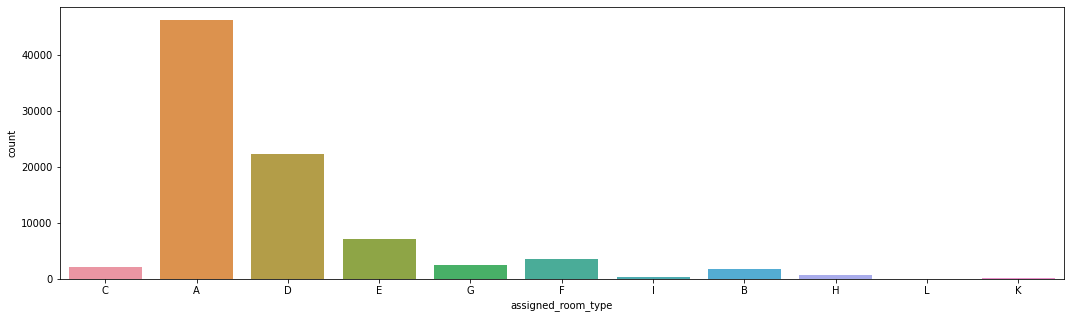

In [ ]:
fig, axes=plt.subplots(figsize=(18,5))


grp_by_room=data.groupby('assigned_room_type')
data['num_of_bookings']=grp_by_room.size()

sns.countplot(x=data['assigned_room_type'])
#sns.boxplot(ax=axes[1],x=data['assigned_room_type'],y=data['adr'])
plt.show()


Most demanded room type is A. Hotel should increase room type A to increase the revenue.

##5.Which room type generate highest adr

Text(0.5, 1.0, 'ADR according to room type')

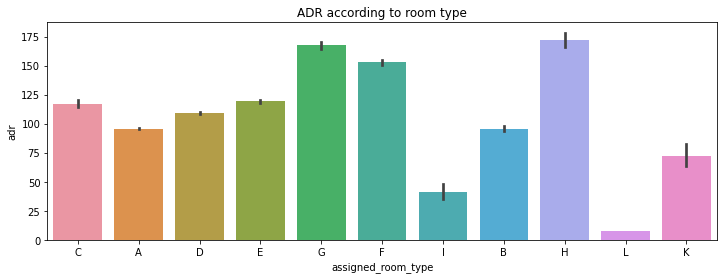

In [ ]:
plt.figure(figsize=(12,4))

grp_by_room = data.groupby('assigned_room_type')
data['Num_of_bookings'] = grp_by_room.size()
ax = sns.barplot(x = data['assigned_room_type'], y = data['adr'])
ax.set_title("ADR according to room type")

Although room type A was on demand and most booked room. Highest revenue was produced by room type H followed by G.We can say that room type H and G are luxury rooms.

## 6.Which meal type is most preferred meal of customers?

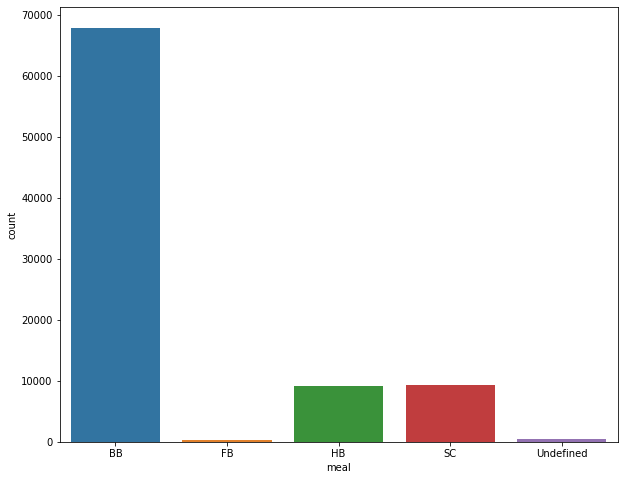

In [ ]:
plt.figure( figsize=(10, 8))

sns.countplot(x = data['meal'])
plt.show()

Most preferred meal type is BB i.e Bed and breakfast.

## 7.How many booking were cancelled?

In [ ]:
#groupby hotel and is cancelleed to get value count
Cancellations = data.groupby(['is_canceled','hotel'])['hotel'].count()


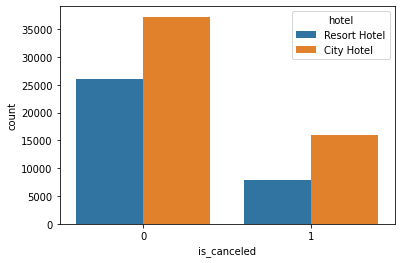

In [ ]:
#plotting countplot
sns.countplot(x = 'is_canceled', hue='hotel', data=data)

Around 8000 Resort Hotel and 16000 City Hotel got cancelled.

## 8.Which type of customers are most repeated?

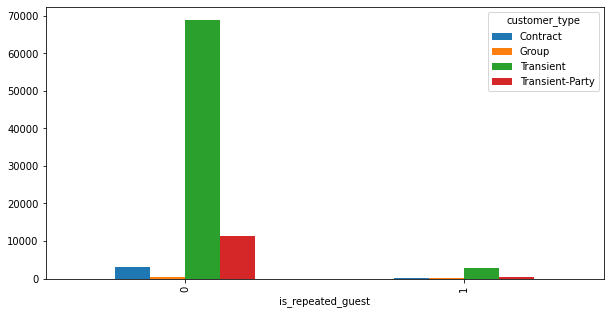

In [ ]:
repeted_guests=data.groupby(['is_repeated_guest','customer_type']).size().unstack()
repeted_guests.plot(kind='bar',figsize=(10,5))

Here, we can see that the maximum number of repeated guest are "Transient type" i.e the "Short-time customers"

##9. Booking cancellation and Repeated guest

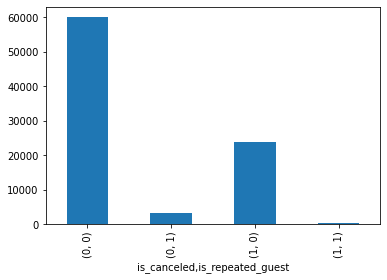

In [ ]:
data1=data.groupby(['is_canceled','is_repeated_guest']).size()
data1.plot(kind='bar')

We see that when the hotel booking is cancelled and the customer is a repeated guest, the entries are almost '0', which means that repeated guest is very less likely to cancel his booking with hotel.

## 10.Now we will check whether not getting allotted the same room type as demanded is the cause of cancellation of bookings


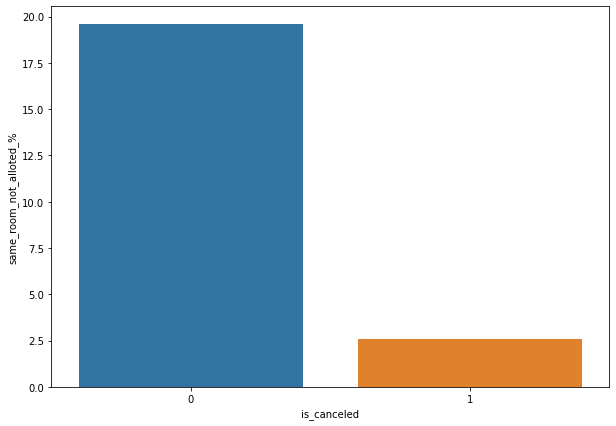

In [ ]:
#defining function to know guest get same room or not
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

#applying function
data['same_room_not_alloted'] = data.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = data.groupby('is_canceled')

#plotting barplot
D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.show()

Here we see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.

Month wise cancellation when not getting desired room?

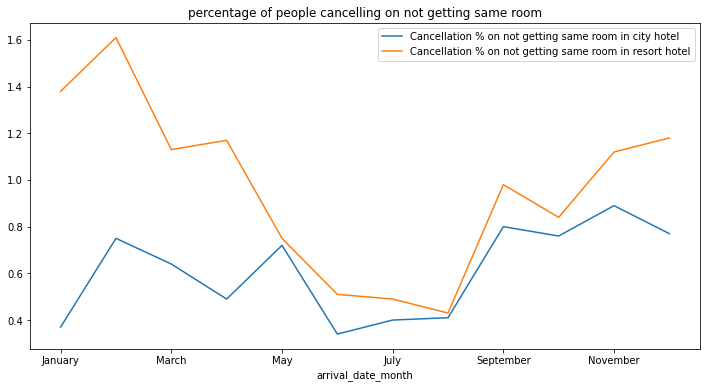

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


df1=data.iloc[:,[0,1,4,19,20,22]].rename(columns={'deposit_type':'Bookings'}) 
#to get desired columns, and we use the count of deposit_type for bookings made per month
df1=df1[df1['assigned_room_type']!=data['reserved_room_type']]
df1=df1.groupby(['arrival_date_month','hotel']).agg({'is_canceled':'sum','Bookings':'count'}).unstack().reindex(new_order, axis=0)


df2=data.iloc[:,[0,4,22]] #now we find the number of bookings made per month
df2=df2.groupby(['arrival_date_month','hotel'])['deposit_type'].size().unstack().reindex(new_order, axis=0)

#df1 gives the number of cancellations per month for each hotel type and the number of bookings, but booking numbers are only for
#those conditions where customers don't get desired rooms.

#df2 is the monthly number of bookings for each hotel type
cancellation_on_not_getting_same_room_city_hotel_df=pd.DataFrame(round((df1['is_canceled','City Hotel']/df2['City Hotel'])*100,2))
cancellation_on_not_getting_same_room_resort_hotel_df=pd.DataFrame(round((df1['is_canceled','Resort Hotel']/df2['Resort Hotel'])*100,2))
cancellation_not_same_room = cancellation_on_not_getting_same_room_city_hotel_df.merge(cancellation_on_not_getting_same_room_resort_hotel_df,how='inner',on='arrival_date_month')
cancellation_sr=cancellation_not_same_room.rename(columns={'0_x':'Cancellation % on not getting same room in city hotel','0_y':'Cancellation % on not getting same room in resort hotel'})
df3=cancellation_sr
df3.plot(title='percentage of people cancelling on not getting same room',figsize=(12,6))

Here, we see that  the cancellation is very less for resort and city hotel which is quite negligible.Guests are ready to not to cancel their booking even if not getting desired room.

## 11.Lets see does not getting same room affects the adr.

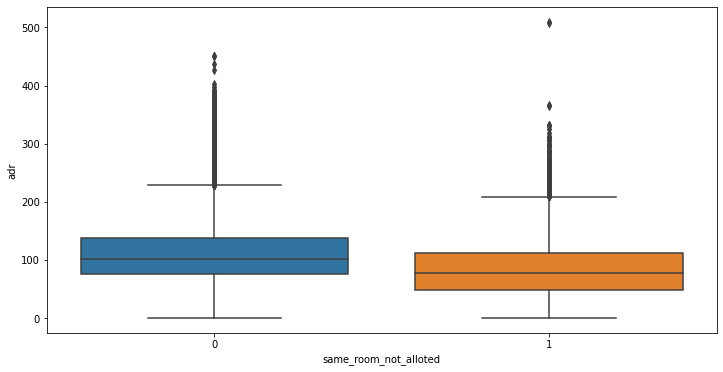

In [ ]:
data.drop(data[data['adr'] > 5000].index, inplace = True) #Dropping Outliers
plt.figure(figsize = (12,6))
sns.boxplot(x = 'same_room_not_alloted', y = 'adr', data = data)
plt.show()

Not getting same room do affects the adr, if people didn't get same room have paid a little lower.

 ## 12. Which is the most common channel for booking hotels?

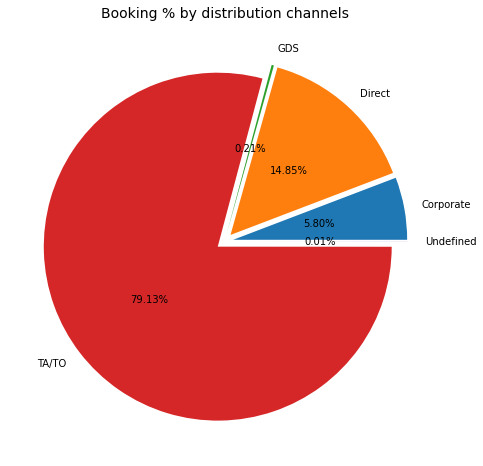

In [ ]:
group_by_dc = data.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/data.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
d = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=d, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

Guests use different channels for making bookings out of which most preferred way is TA/TO.

## 13.Distribution channel and the Days on waiting list

<function matplotlib.pyplot.show>

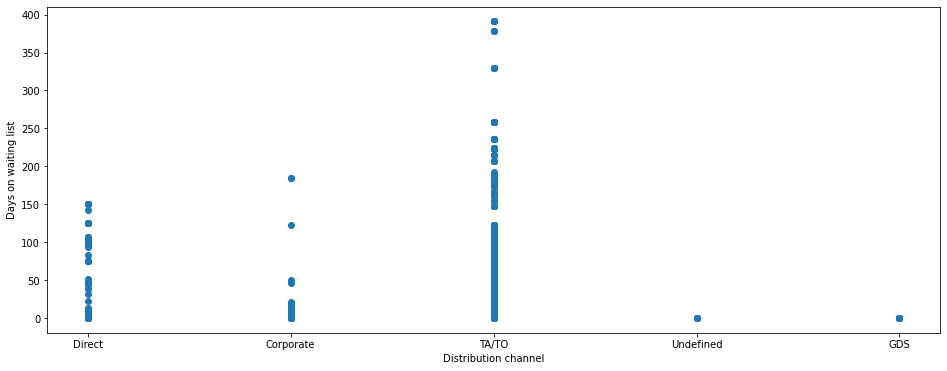

In [ ]:
fig,ax = plt.subplots(figsize=(16,6))
#plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots
ax.scatter(data['distribution_channel'], data['days_in_waiting_list'])
ax.set_xlabel('Distribution channel')
ax.set_ylabel('Days on waiting list')
plt.show

We see that the 'Travel Agent' and 'Tour Operators' are the distribution channel for which the highest number of days are there on the waiting list.

## 14.Which  distribution channel has highest cancellation percentage?

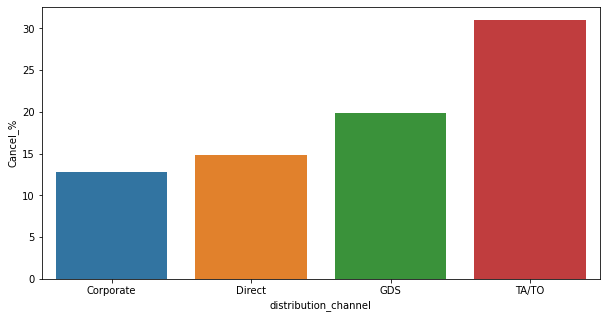

In [ ]:
#groupby distribution channel
group_by_dc = data.groupby('distribution_channel')
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})

#plotting barplot
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

## 15. Days on waiting list and Market segment

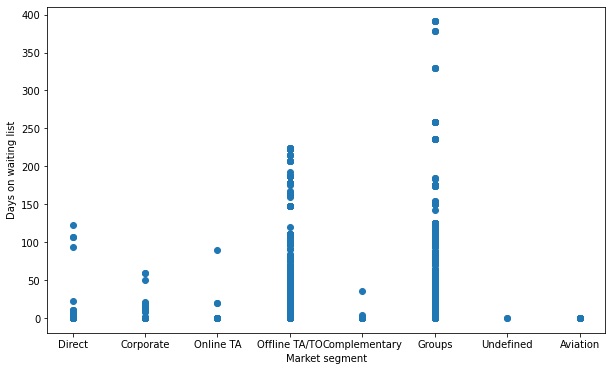

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
#plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots
ax.scatter(data['market_segment'], data['days_in_waiting_list'])
ax.set_xlabel('Market segment')
ax.set_ylabel('Days on waiting list')
plt.show()

Here, we see that Aviation industry have the minimum number of days on the waiting list. The reason for this might be that when a flight has to be land at the location, it has to provide immediate accomodation to all of its working staff like Pilots, Air hostages etc. so they do not entertain hotels which put them on a waiting list for too long. So, in general, the hotel management sees that there needs are met immediately and provide rooms to them with almost 0 days on the waiting list.

## 16. Effect of lead time on cancellation

Here, we have visualised the most important factor which is "Lead time".

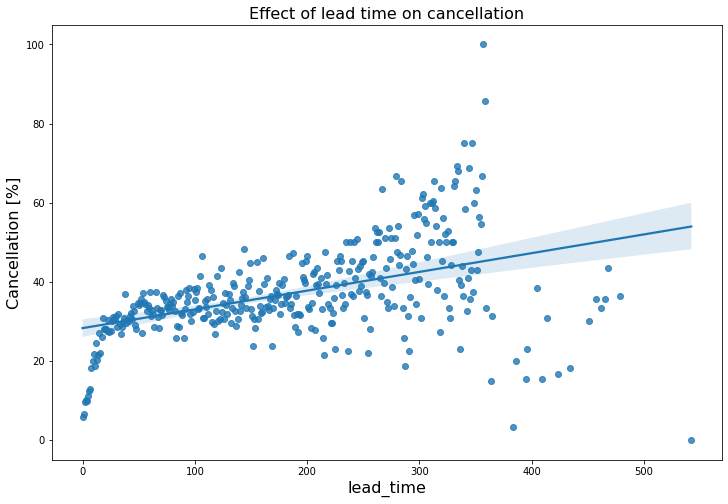

In [ ]:
lead_cancel_data = data.groupby("lead_time")["is_canceled"].describe()
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >=10]
plt.figure(figsize=(12,8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values *100)
plt.title("Effect of lead time on cancellation", fontsize=16)
plt.xlabel("lead_time", fontsize=16)
plt.ylabel("Cancellation [%]", fontsize=16)
#plt.xlin(0,365)
plt.show()

We see the Effect of Lead time on Cancelation is POSITIVE i.e as the lead time increases, the number of cancelation increases.



##17.Now we are comparing different variables month wise

In [ ]:
# Create list of months 
month_index = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [ ]:
data['adr_pp'] = data['adr'] / (data['adults'] + data['children']+data['babies']) 

In [ ]:
# calculating average ADR monthwise.
adr_month=round(data.groupby('arrival_date_month')['adr'].mean().reindex(month_index),2)

# Calculating No.of booking Monthwise.
# Confirmed Bookings
confirmed = data[data['is_canceled']==0]
# arranging hotel bookings according to month index
booking_by_month = confirmed['arrival_date_month'].value_counts().reindex(month_index)
booking_by_month.cloumns = ['Month','Bookings']

# Calculating Average wait_time monthly.
avg_wait = data.groupby('arrival_date_month')['days_in_waiting_list'].mean().reindex(month_index)


# Calculating Average lead_time monthly.
avg_lead = data.groupby('arrival_date_month')['lead_time'].mean().reindex(month_index)


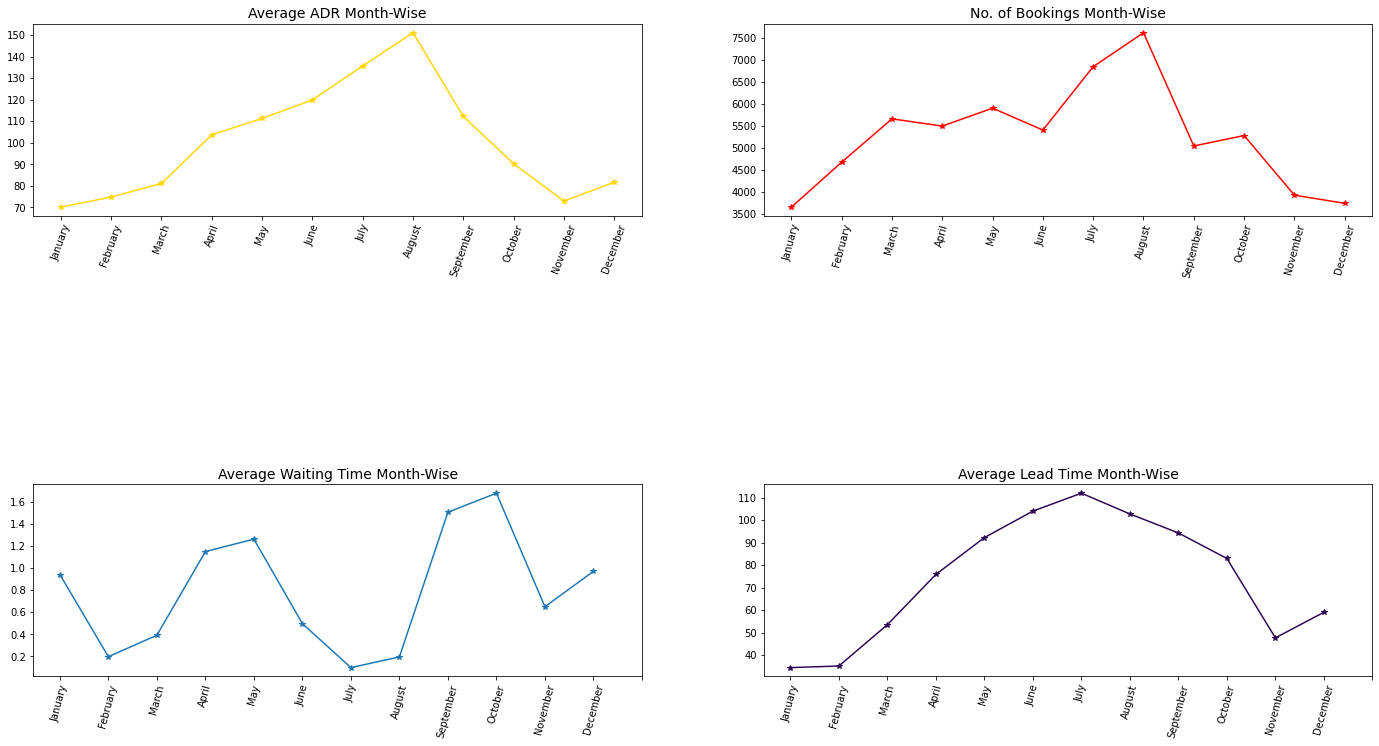

In [ ]:
fig = plt.figure(figsize=(24,12))
#  subplot #1
plt.subplot(321)
plt.title('Average ADR Month-Wise', fontsize=14)
plt.plot(adr_month.index,adr_month.values,'-*',color='#FFD700')
plt.xticks(ticks=np.arange(12),labels=adr_month.index, rotation=70)

#  subplot #2
plt.subplot(322)
plt.title('No. of Bookings Month-Wise', fontsize=14)
plt.plot(booking_by_month.index,booking_by_month.values,'-*',color='red')
plt.xticks(ticks=np.arange(12),labels= booking_by_month.index, rotation=75)

#  subplot #3
plt.subplot(325)
plt.title('Average Waiting Time Month-Wise', fontsize=14)
plt.plot(avg_wait.index,avg_wait.values,'-*')
plt.xticks(ticks=np.arange(13),labels=avg_wait.index, rotation=75)

#  subplot #4
plt.subplot(326)
plt.title('Average Lead Time Month-Wise', fontsize=14)
plt.plot(avg_lead.index,avg_lead.values,'-*',color='#2E0854')
plt.xticks(ticks=np.arange(13),labels=avg_lead.index, rotation=75)

plt.show()

So we can see that Price and no. of bookings are less in months from October to February, also in this period average lead time is also low as compared to other months. Only thing concerning is waiting time which is somewhat on higher side from Month October to February. But when waiting time is least ,price is highest for that period i.e for the month of July & August.

So best time would be from October to feb to book hotel to get cheaper price as well as to get some privacy.

## 18.Which is preferred stay length in each hotel?

In [ ]:
# What is the Optimal stay length in both type of hotels ?

In [ ]:
data.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_guests,num_of_bookings,Num_of_bookings,same_room_not_alloted,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,0,2,NaN,NaN,0,0.0


In [ ]:
(data[data['total_stay']==1]).count()

hotel                             17168
is_canceled                       17168
lead_time                         17168
arrival_date_year                 17168
arrival_date_month                17168
arrival_date_week_number          17168
arrival_date_day_of_month         17168
stays_in_weekend_nights           17168
stays_in_week_nights              17168
adults                            17168
children                          17168
babies                            17168
meal                              17168
country                           17168
market_segment                    17168
distribution_channel              17168
is_repeated_guest                 17168
previous_cancellations            17168
previous_bookings_not_canceled    17168
reserved_room_type                17168
assigned_room_type                17168
booking_changes                   17168
deposit_type                      17168
agent                             17168
days_in_waiting_list              17168


In [ ]:
stay=data.groupby(['total_stay','hotel']).agg("count").reset_index()

In [ ]:
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_stay,hotel,Number of stays
0,0,City Hotel,231
1,0,Resort Hotel,360
2,1,City Hotel,10269
3,1,Resort Hotel,6899
4,2,City Hotel,10813
...,...,...,...
68,46,Resort Hotel,1
69,48,City Hotel,1
70,56,Resort Hotel,2
71,60,Resort Hotel,1


Text(0.5, 0, 'total_stay(days)')

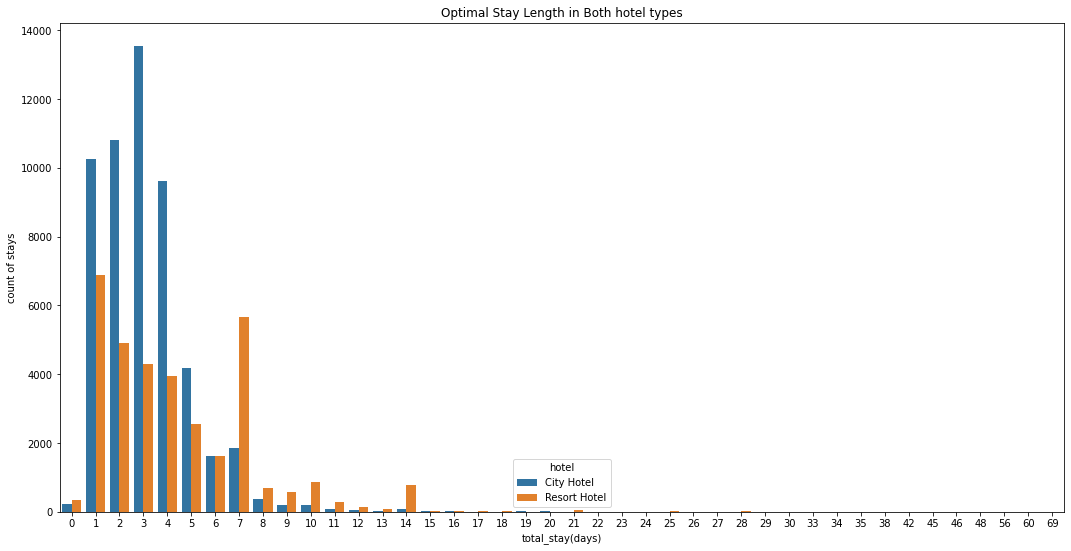

In [ ]:
plt.figure(figsize = (18,9))
sns.barplot(x = 'total_stay', y = 'Number of stays',data= stay,hue='hotel')

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')

Most people prefer to stay at the hotels of <=5 days in both types of hotel.
However in resort type people tend to stay longer.

## **Conclusion**

* Higher lead time has higher chance of cancellation.

* July August are the busiest and most profitable months for both the hotels.

* The best time to book a hotel would be between October to February to get for cheaper price.

* Most people prefer to stay in the hotels for at least five days in both types of hotel. However, people tend to stay longer at resort hotels.

* Maximum number of repeated guests are "Transient type" le., the "Short-time customers"



* City hotels receive around 60% of bookings, while Resort hotels receive 40%, hence city hotels are busier than Resort hotels. 7. City hotel's total adr is slightly higher than Resort hotel's



* Most of the guests were from European countries, with the most coming from Portugal followed by Great Britain and France.

* Guests use different channels for making bookings out of which most preferred way is TA/TO. 10. Almost 30% of bookings via TA/TO are cancelled

* Bookings are not affected if they do not receive the same ro-reserved. Although different room allotment does-lessen the adr. 
*   And many more conclusions. 
 


## **Thank** **you**